In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [363]:
df = pd.read_csv('data.csv')

In [364]:
df.head()
df.rename(columns = {'num       ':'Target'}, inplace = True)

In [365]:
df.drop(['slope','ca','thal'],axis=1,inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,Target
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,?,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


## Number of missing values for each column

In [366]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']

In [367]:
counts = []
for col in columns:
    counts.append(df[df[col]=='?']['age'].count())
counts

C:\Users\fq1228hj\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[0, 0, 0, 1, 23, 8, 1, 1, 1, 0]

In [368]:
missing_values = dict(zip(columns, counts))
missing_values

{'age': 0,
 'sex': 0,
 'cp': 0,
 'trestbps': 1,
 'chol': 23,
 'fbs': 8,
 'restecg': 1,
 'thalach': 1,
 'exang': 1,
 'oldpeak': 0}

## Replace missing values in 'trestbps', 'chol', 'thalach' columns with mean of column

In [369]:
columns_replaceby_mean = ['trestbps','chol','thalach']

In [370]:
for item1 in columns_replaceby_mean:
    list1 = df[item1].tolist()
    list1 = filter(lambda a: a != '?', list1)
    list2 = []
    for item2 in list1:
        list2.append(float(item2))
    avg = np.average(list2)
    list3 = list(df[df[item1] == '?'].index)
    for item3 in list3:
        df[item1][item3] = avg

C:\Users\fq1228hj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [371]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     age  sex  cp trestbps     chol fbs restecg thalach exang  oldpeak  Target
0     28    1   2      130      132   0       2     185     0      0.0       0
1     29    1   2      120      243   0       0     160     0      0.0       0
2     29    1   2      140  250.849   0       0     170     0      0.0       0
3     30    0   1      170      237   0       1     170     0      0.0       0
4     31    0   2      100      219   0       1     150     0      0.0       0
5     32    0   2      105      198   0       0     165     0      0.0       0
6     32    1   2      110      225   0       0     184     0      0.0       0
7     32    1   2      125      254   0       0     155     0      0.0       0
8     33    1   3      120      298   0       0     185     0      0.0       0
9     34    0   2      130      161   0       0     190     0      0.0       0
10    34    1   2      150      214   0       1     168     0      0.0       0
11    34    1   2       98      220   0       0     

## Replace missing values in 'fbs', 'restecg', and 'exang' with most frequent value

In [372]:
columns_replaceby_mode = ['fbs','restecg','exang']

In [373]:
#all zero
for col in columns_replaceby_mode:
    print(df[col].mode())

0    0
dtype: object
0    0
dtype: object
0    0
dtype: object


In [374]:
#replace '?' with 0
for col in columns_replaceby_mode:
    for i in range(0,len(df[col])-1):
        if df[col][i] == '?':
            df[col][i] = 0

C:\Users\fq1228hj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [375]:
#all '?' fields replaced properly
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     age  sex  cp trestbps     chol fbs restecg thalach exang  oldpeak  Target
0     28    1   2      130      132   0       2     185     0      0.0       0
1     29    1   2      120      243   0       0     160     0      0.0       0
2     29    1   2      140  250.849   0       0     170     0      0.0       0
3     30    0   1      170      237   0       1     170     0      0.0       0
4     31    0   2      100      219   0       1     150     0      0.0       0
5     32    0   2      105      198   0       0     165     0      0.0       0
6     32    1   2      110      225   0       0     184     0      0.0       0
7     32    1   2      125      254   0       0     155     0      0.0       0
8     33    1   3      120      298   0       0     185     0      0.0       0
9     34    0   2      130      161   0       0     190     0      0.0       0
10    34    1   2      150      214   0       1     168     0      0.0       0
11    34    1   2       98      220   0       0     

## Convert all values to float

In [376]:
for col in columns:
        df[col] = df[col].astype(float)

In [377]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

      age  sex   cp    trestbps        chol  fbs  restecg     thalach  exang  \
0    28.0  1.0  2.0  130.000000  132.000000  0.0      2.0  185.000000    0.0   
1    29.0  1.0  2.0  120.000000  243.000000  0.0      0.0  160.000000    0.0   
2    29.0  1.0  2.0  140.000000  250.848708  0.0      0.0  170.000000    0.0   
3    30.0  0.0  1.0  170.000000  237.000000  0.0      1.0  170.000000    0.0   
4    31.0  0.0  2.0  100.000000  219.000000  0.0      1.0  150.000000    0.0   
5    32.0  0.0  2.0  105.000000  198.000000  0.0      0.0  165.000000    0.0   
6    32.0  1.0  2.0  110.000000  225.000000  0.0      0.0  184.000000    0.0   
7    32.0  1.0  2.0  125.000000  254.000000  0.0      0.0  155.000000    0.0   
8    33.0  1.0  3.0  120.000000  298.000000  0.0      0.0  185.000000    0.0   
9    34.0  0.0  2.0  130.000000  161.000000  0.0      0.0  190.000000    0.0   
10   34.0  1.0  2.0  150.000000  214.000000  0.0      1.0  168.000000    0.0   
11   34.0  1.0  2.0   98.000000  220.000

## Data Visualization

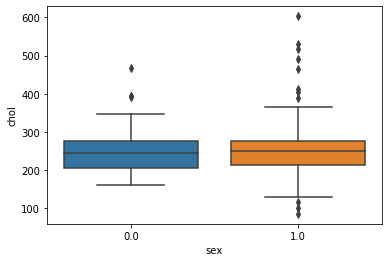

In [378]:
#0 = female, 1 = male
sns.boxplot(x='sex',y='chol',data=df)

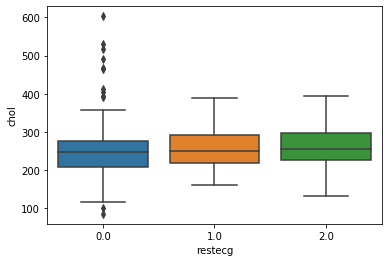

In [379]:
#restecg
#Value 0: normal
#Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo (month of exercise ECG reading)
sns.boxplot(x='restecg',y='chol',data=df)

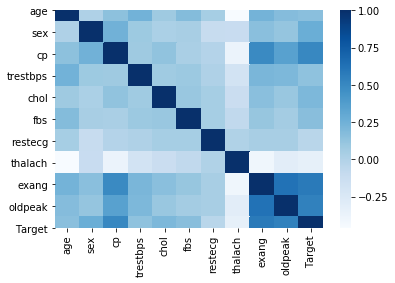

In [380]:
sns.heatmap(df.corr(),cmap='Blues')

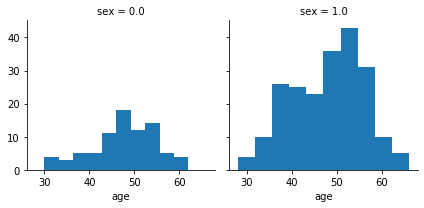

In [381]:
#0 = female, 1 = male
g = sns.FacetGrid(col='sex',data=df)
g = g.map(plt.hist, 'age')

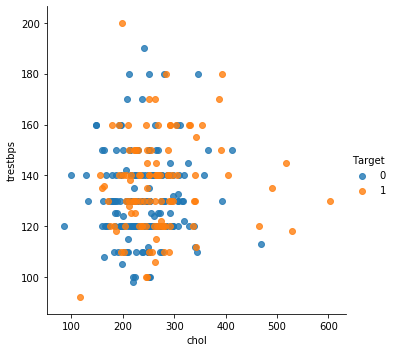

In [382]:
#Target: diagnosis of heart disease (angiographic disease status)
#Value 0: < 50% diameter narrowing
#Value 1: > 50% diameter narrowing
sns.lmplot(x='chol',y='trestbps',data=df,hue='Target',fit_reg=False)

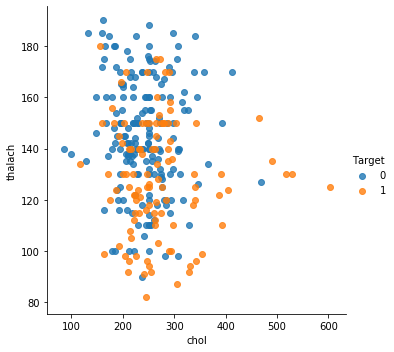

In [383]:
sns.lmplot(x='chol',y='thalach',data=df,hue='Target',fit_reg=False)

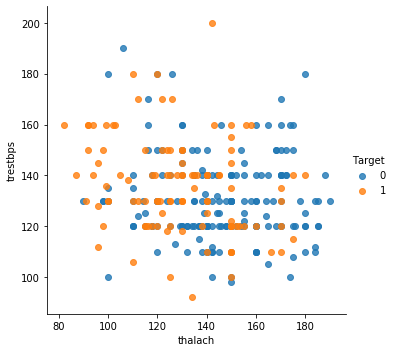

In [384]:
sns.lmplot(x='thalach',y='trestbps',data=df,hue='Target',fit_reg=False)

## KNN Model

In [385]:
from sklearn.preprocessing import StandardScaler

In [386]:
scaler = StandardScaler()

In [387]:
scaler.fit(df.drop('Target', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [388]:
scaled_features = scaler.transform(df.drop('Target', axis=1))

In [389]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,-2.542347,0.616670,-1.020259,-0.147076,-1.833027,-0.270172,3.879035,1.951150,-0.658898,-0.646074
1,-2.414117,0.616670,-1.020259,-0.716341,-0.121052,-0.270172,-0.473775,0.887744,-0.658898,-0.646074
2,-2.414117,0.616670,-1.020259,0.422189,0.000000,-0.270172,-0.473775,1.313106,-0.658898,-0.646074
3,-2.285888,-1.621613,-2.058170,2.129984,-0.213591,-0.270172,1.702630,1.313106,-0.658898,-0.646074
4,-2.157658,-1.621613,-1.020259,-1.854871,-0.491209,-0.270172,1.702630,0.462382,-0.658898,-0.646074


In [390]:
X = df_feat
y = df['Target']

In [391]:
from sklearn.model_selection import train_test_split

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [393]:
from sklearn.neighbors import KNeighborsClassifier

In [394]:
knn = KNeighborsClassifier(n_neighbors=1)

In [395]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [396]:
predictions = knn.predict(X_test)

In [397]:
from sklearn.metrics import classification_report,confusion_matrix

In [398]:
print(confusion_matrix(y_test, predictions))

[[47 12]
 [ 6 24]]


In [399]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        59
           1       0.67      0.80      0.73        30

    accuracy                           0.80        89
   macro avg       0.78      0.80      0.78        89
weighted avg       0.81      0.80      0.80        89



In [400]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))

Text(0, 0.5, 'Error')

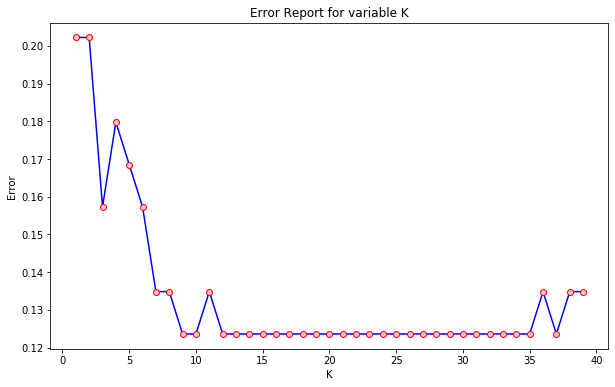

In [401]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',mfc='pink',mec='red')
plt.title('Error Report for variable K')
plt.xlabel('K')
plt.ylabel('Error')

In [442]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
pred_22 = knn.predict(X_test)
print('K=22 (best model)')
print('\n')
print(confusion_matrix(y_test,pred_22))
print('\n')
print(classification_report(y_test,pred_22))

K=22 (best model)


[[56  3]
 [ 8 22]]


              precision    recall  f1-score   support

           0       0.88      0.95      0.91        59
           1       0.88      0.73      0.80        30

    accuracy                           0.88        89
   macro avg       0.88      0.84      0.86        89
weighted avg       0.88      0.88      0.87        89



## Decision Tree

In [403]:
from sklearn.model_selection import train_test_split

In [404]:
X1=df.drop('Target',axis=1)
y1=df['Target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state=3)

In [405]:
from sklearn.tree import DecisionTreeClassifier

In [406]:
dtree = DecisionTreeClassifier()

In [407]:
dtree.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [408]:
predictions1 = dtree.predict(X1_test)

In [409]:
from sklearn.metrics import confusion_matrix, classification_report

In [410]:
print(confusion_matrix(y1_test,predictions1))

[[50  9]
 [11 19]]


In [411]:
print(classification_report(y1_test,predictions1))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        59
           1       0.68      0.63      0.66        30

    accuracy                           0.78        89
   macro avg       0.75      0.74      0.74        89
weighted avg       0.77      0.78      0.77        89



## Random Forest

In [412]:
from sklearn.ensemble import RandomForestClassifier

In [413]:
rForest = RandomForestClassifier()

In [414]:
rForest.fit(X1_train,y1_train)

C:\Users\fq1228hj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [415]:
rForest_predictions = rForest.predict(X1_test)

In [416]:
print(classification_report(y1_test,rForest_predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        59
           1       0.71      0.67      0.69        30

    accuracy                           0.80        89
   macro avg       0.78      0.77      0.77        89
weighted avg       0.80      0.80      0.80        89



In [417]:
print(confusion_matrix(y1_test,rForest_predictions))

[[51  8]
 [10 20]]
